# Bank Churn prediction

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


%matplotlib inline

## Import Dataset

In [2]:
dataset1 = pd.read_csv("Churn_Modelling.csv")

## EDA Steps

In [3]:
dataset1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset1.shape

(10000, 14)

In [5]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
dataset1.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
dataset1.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [8]:
dataset1['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
dataset1['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
dataset1['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
dataset1.groupby(['Geography'])['Exited'].value_counts()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

In [12]:
pd.crosstab(dataset1['Geography'] , dataset1['Exited'])

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [13]:
pd.crosstab(dataset1['NumOfProducts'] , dataset1['Exited'])

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


In [14]:
pd.crosstab(dataset1['HasCrCard'] , dataset1['Exited'])

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


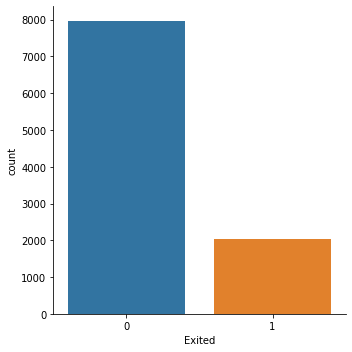

In [15]:
sns.catplot(x='Exited',data=dataset1, kind='count')

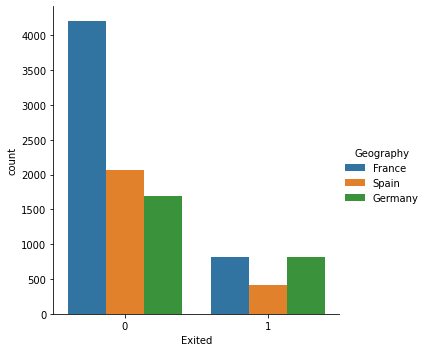

In [16]:
sns.catplot(x='Exited', data=dataset1, kind='count', hue='Geography')

## Preprocessing Steps

### Encoding Categorical data

#### For Column Gender

In [17]:
dict={'Female':0,'Male':1}
dataset1['Gender'] = dataset1['Gender'].map(dict)
dataset1.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8610,8611,15731553,Lucas,730,France,1,23,8,0.00,2,1,0,183284.53,0
1523,1524,15751531,Shaw,598,Spain,1,41,8,0.00,2,1,1,161954.43,0
7376,7377,15765093,Coates,704,France,1,23,6,166594.78,1,1,1,155823.20,0
7043,7044,15704581,Robertson,595,Germany,1,34,2,87967.42,2,0,1,156309.52,0
8330,8331,15707974,Anayochukwu,815,Spain,0,38,2,48387.00,1,1,0,184796.84,0


#### For column Geography

In [18]:
dataset2=dataset1[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
dataset2.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8200,767,Spain,1,47,5,0.00,1,1,0,121964.46
4664,697,France,0,23,10,0.00,2,1,1,79734.23
7756,621,Spain,0,36,7,116338.68,1,1,1,155743.48
3479,468,France,1,46,7,91443.75,1,1,0,10958.18
6489,841,France,0,31,3,162701.65,2,1,1,126794.56


In [19]:
dataset2 = pd.get_dummies(dataset2, columns = ['Geography'])

In [20]:
dataset2.sample(4)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
8823,675,0,50,1,133204.91,1,0,1,8270.06,0,0,1
3009,551,1,31,1,0.00,2,1,1,185105.44,1,0,0
7915,695,1,56,1,0.00,3,1,0,187734.49,0,0,1
5952,590,1,29,10,0.00,1,1,1,51907.72,0,0,1


In [21]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


### Separate the dataset into independent and dependent variables

In [22]:
X=dataset2
y=dataset1.iloc[:,-1]

In [23]:
print(X.shape,  y.shape)

(10000, 12) (10000,)


### Normalize Data (Feature Scaling)

In [24]:
from sklearn import preprocessing
X = preprocessing.MinMaxScaler().fit(X).transform(X)

In [25]:
X[:1]

array([[0.538     , 0.        , 0.32432432, 0.2       , 0.        ,
        0.        , 1.        , 1.        , 0.50673489, 1.        ,
        0.        , 0.        ]])

### Separate training and testing data

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=57)

In [27]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7000, 12) (7000,)
(3000, 12) (3000,)


## Classification Model

### Support Vector Machine (SVM)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


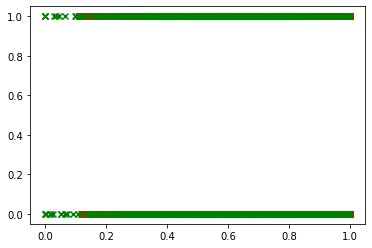

In [28]:
from matplotlib.colors import ListedColormap
markers = ('s', 'x')
colors = ('red', 'green')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], c=cmap(idx), marker=markers[idx], label=cl)

In [29]:
df0=dataset2[dataset1.Exited==0]
df1=dataset2[dataset1.Exited==1]

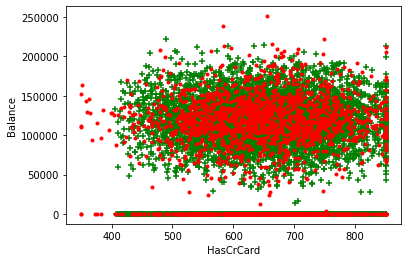

In [30]:
plt.xlabel('HasCrCard')
plt.ylabel('Balance')

plt.scatter(df0['CreditScore'],df0['Balance'],color='green',marker='+')
plt.scatter(df1['CreditScore'],df1['Balance'],color='red',marker='.')

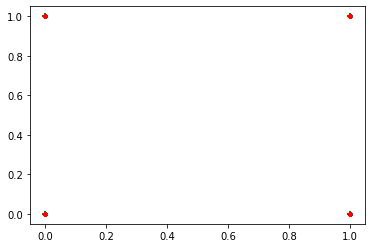

In [31]:
plt.scatter(df0['Gender'],df0['HasCrCard'],color='green',marker='+')
plt.scatter(df1['Gender'],df1['HasCrCard'],color='red',marker='.')

In [32]:
from sklearn.svm import SVC
svm2=SVC()
svm2.fit(X_train,y_train)

SVC()

In [33]:
ypred=svm2.predict(X_test)
print('accuracy:',metrics.accuracy_score(y_test,ypred))
print('F1 score of svm: ',metrics.f1_score(y_test,ypred,average='weighted'))
print('Jaccard Score of svm: ',metrics.jaccard_score(y_test,ypred))

accuracy: 0.835
F1 score of svm:  0.7949710165043987
Jaccard Score of svm:  0.22535211267605634


#### Parameter Tuning Using Grid Search CV

In [34]:
from sklearn.model_selection import GridSearchCV
svm_clf = {'C':[1,10,20,57],
           'gamma':[1,0.01,0.03,0.07],
           'kernel':['poly','rbf','sigmoid'],
            }

svm_grid = GridSearchCV(SVC(),svm_clf,refit=True,verbose=2)
svm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   3.3s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   3.4s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   3.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   3.5s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   3.8s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   2.4s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   2.4s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   2.3s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   1.6s
[CV] END .......................C=1, gamma=1, k

[CV] END ...................C=10, gamma=0.03, kernel=sigmoid; total time=   1.7s
[CV] END ...................C=10, gamma=0.03, kernel=sigmoid; total time=   1.9s
[CV] END ...................C=10, gamma=0.03, kernel=sigmoid; total time=   1.7s
[CV] END ...................C=10, gamma=0.03, kernel=sigmoid; total time=   1.8s
[CV] END ......................C=10, gamma=0.07, kernel=poly; total time=   1.0s
[CV] END ......................C=10, gamma=0.07, kernel=poly; total time=   1.1s
[CV] END ......................C=10, gamma=0.07, kernel=poly; total time=   1.2s
[CV] END ......................C=10, gamma=0.07, kernel=poly; total time=   1.1s
[CV] END ......................C=10, gamma=0.07, kernel=poly; total time=   1.1s
[CV] END .......................C=10, gamma=0.07, kernel=rbf; total time=   2.2s
[CV] END .......................C=10, gamma=0.07, kernel=rbf; total time=   2.6s
[CV] END .......................C=10, gamma=0.07, kernel=rbf; total time=   2.3s
[CV] END ...................

[CV] END .......................C=57, gamma=0.01, kernel=rbf; total time=   6.9s
[CV] END .......................C=57, gamma=0.01, kernel=rbf; total time=   7.0s
[CV] END ...................C=57, gamma=0.01, kernel=sigmoid; total time=   6.4s
[CV] END ...................C=57, gamma=0.01, kernel=sigmoid; total time=   5.3s
[CV] END ...................C=57, gamma=0.01, kernel=sigmoid; total time=   6.8s
[CV] END ...................C=57, gamma=0.01, kernel=sigmoid; total time=   6.4s
[CV] END ...................C=57, gamma=0.01, kernel=sigmoid; total time=   5.4s
[CV] END ......................C=57, gamma=0.03, kernel=poly; total time=   2.6s
[CV] END ......................C=57, gamma=0.03, kernel=poly; total time=   2.3s
[CV] END ......................C=57, gamma=0.03, kernel=poly; total time=   4.5s
[CV] END ......................C=57, gamma=0.03, kernel=poly; total time=   2.1s
[CV] END ......................C=57, gamma=0.03, kernel=poly; total time=   4.4s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 20, 57], 'gamma': [1, 0.01, 0.03, 0.07],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             verbose=2)

In [35]:
print("Tuned Parameters: ",svm_grid.best_params_)
print("Accuracy : ", svm_grid.best_score_)

Tuned Parameters:  {'C': 1, 'gamma': 1, 'kernel': 'poly'}
Accuracy :  0.857


In [36]:
svm=SVC(C=1,kernel='poly',gamma=1,probability=True)
print(svm)

SVC(C=1, gamma=1, kernel='poly', probability=True)


In [37]:
svm.fit(X_train,y_train)

SVC(C=1, gamma=1, kernel='poly', probability=True)

In [38]:
svm_ypred = svm.predict(X_test)

In [75]:
svm_accuracy=metrics.accuracy_score(y_test,svm_ypred)
svm_f1_score=metrics.f1_score(y_test,svm_ypred,average='weighted')
svm_jaccard_score=metrics.jaccard_score(y_test,svm_ypred,pos_label=0)

print('Accuracy of svm: ',svm_accuracy)
print('F1 score of svm: ',svm_f1_score)
print('Jaccard Score of svm: ',svm_jaccard_score)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train, y_train)))
print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test, y_test)))

Accuracy of svm:  0.8503333333333334
F1 score of svm:  0.8282329550691556
Jaccard Score of svm:  0.838023088023088
The accuracy of the svm classifier on training data is 0.86 out of 1
The accuracy of the svm classifier on test data is 0.85 out of 1


## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_predlr = logreg.predict(X_test)


In [41]:
lraccuracy=metrics.accuracy_score(y_test,y_predlr)
lrf1_score=metrics.f1_score(y_test,y_predlr,average='weighted')
lrjaccard_score=metrics.jaccard_score(y_test,y_predlr,pos_label=0)

print('Accuracy of LR: ',lraccuracy)
print('F1 score of LR: ',lrf1_score)
print('Jaccard Score of LR: ',lrjaccard_score)

Accuracy of LR:  0.806
F1 score of LR:  0.7651776061776062
Jaccard Score of LR:  0.7979868101353697


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lrParameters={
    'penalty':['l1','l2'],
    'C':np.logspace(3,5,7),
    'solver':['lbfgs', 'liblinear', 'newton-cg']
}
lr=LogisticRegression()
lr_grid = GridSearchCV(lr,lrParameters,scoring='accuracy',cv=5)
lr_grid.fit(X_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\AppData\Local\Programs\Pyt

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([  1000.        ,   2154.43469003,   4641.58883361,  10000.        ,
        21544.34690032,  46415.88833613, 100000.        ]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring='accuracy')

In [43]:
print("Tunned Parmeter : ", lr_grid.best_params_)
print("Accuracy :",lr_grid.best_score_)

Tunned Parmeter :  {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.8097142857142858


In [44]:
log_reg_tunned = lr_grid.best_estimator_
log_reg_tunned.fit(X_train,y_train)

LogisticRegression(C=1000.0, penalty='l1', solver='liblinear')

In [45]:
lr_predicted=log_reg_tunned.predict(X_test)

In [46]:
lr_accuracy=metrics.accuracy_score(y_test,lr_predicted)
lr_f1_score=metrics.f1_score(y_test,lr_predicted,average='weighted')
lr_jaccard_score=metrics.jaccard_score(y_test,lr_predicted,pos_label=0)

print('Accuracy of LR: ',lr_accuracy)
print('F1 score of LR: ',lr_f1_score)
print('Jaccard Score of LR: ',lr_jaccard_score)


Accuracy of LR:  0.8046666666666666
F1 score of LR:  0.7654678569302216
Jaccard Score of LR:  0.7963156065345847


## Hyperparameter tunning for RandomForestClassifier and DecisionTreeClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
model_param={
    'random_forest':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators':[10,25,30,50,100,200],
            'max_depth': [2,3,5,10,20],
            'min_samples_leaf': [5,10,20,50,100,200]
        }
    },
    
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion':['gini','entropy'],
            'max_features':['auto','sqrt','log2'],
            'max_depth':[6,7,8,9],
            'ccp_alpha': [0.1, .01, .001]
        }
    }
}

In [49]:
scores=[]
for model_name,mp in model_param.items():
    clf=GridSearchCV(mp['model'], mp['params'])
    clf.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1

In [50]:
scores

[{'model': 'random_forest',
  'best_score': 0.8628571428571428,
  'best_params': {'max_depth': 10,
   'min_samples_leaf': 5,
   'n_estimators': 100}},
 {'model': 'decision_tree',
  'best_score': 0.8475714285714286,
  'best_params': {'ccp_alpha': 0.001,
   'criterion': 'entropy',
   'max_depth': 7,
   'max_features': 'auto'}}]

In [51]:
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [52]:
df

,model,best_score,best_params
0,random_forest,0.862857,"{'max_depth': 10, 'min_samples_leaf': 5, 'n_es..."
1,decision_tree,0.847571,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '..."


## Random Forest Classifier

In [53]:
rf_classifier = RandomForestClassifier(max_depth= 20,
   min_samples_leaf= 5,
   n_estimators= 100)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5)

In [54]:
rf_ypred = rf_classifier.predict(X_test)

In [55]:
rf_accuracy=metrics.accuracy_score(y_test,rf_ypred)
rf_f1_score=metrics.f1_score(y_test,rf_ypred,average='weighted')
rf_jaccard_score=metrics.jaccard_score(y_test,rf_ypred,pos_label=0)

print('Accuracy of Random Forest: ',rf_accuracy)
print('F1 score of Random Forest: ',rf_f1_score)
print('Jaccard Score of Random Forest: ',rf_jaccard_score)


Accuracy of Random Forest:  0.863
F1 score of Random Forest:  0.8458753992999503
Jaccard Score of Random Forest:  0.8497257769652651


## Decision Tree Classifier

In [56]:
dt_classifier = DecisionTreeClassifier(ccp_alpha= 0.001,
   criterion= 'gini',
   max_depth= 7,
   max_features= 'sqrt')
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=7, max_features='sqrt')

In [57]:
dt_ypred = dt_classifier.predict(X_test)

In [58]:
dt_accuracy=metrics.accuracy_score(y_test,dt_ypred)
dt_f1_score=metrics.f1_score(y_test,dt_ypred,average='weighted')
dt_jaccard_score=metrics.jaccard_score(y_test,dt_ypred,pos_label=0)

print('Accuracy of Decision Tree: ',dt_accuracy)
print('F1 score of Decision Tree: ',dt_f1_score)
print('Jaccard Score of  Decision Tree: ',dt_jaccard_score)

Accuracy of Decision Tree:  0.8316666666666667
F1 score of Decision Tree:  0.8174683162788859
Jaccard Score of  Decision Tree:  0.8160291438979964


# Model Evaluation

In [76]:
result = pd.DataFrame({
    'Model': ['SVM','Logistic Regression','Random Forest','Decision Tree'],
    'Jaccard Score':[svm_jaccard_score,lrjaccard_score,rf_jaccard_score,dt_jaccard_score],
    'F1 Score': [svm_f1_score,lrf1_score,rf_f1_score,dt_f1_score],
    'Accuracy': [svm_accuracy,lraccuracy,rf_accuracy,dt_accuracy]
})

In [77]:
result

,Model,Jaccard Score,F1 Score,Accuracy
0,SVM,0.838023,0.828233,0.850333
1,Logistic Regression,0.797987,0.765178,0.806000
2,Random Forest,0.849726,0.845875,0.863000
3,Decision Tree,0.816029,0.817468,0.831667


## Using K-Fold Cross Validation

In [61]:
from sklearn import model_selection
seed=7
models=[]
models.append(('SVM',svm))
models.append(('Logistic Regression',log_reg_tunned))
models.append(('Random Forest',rf_classifier))
models.append(('Decision Tree',dt_classifier))
results=[]
names=[]
scoring='accuracy'
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)

In [62]:
# arr=np.array(results[0])
# print(np.mean(arr))

In [79]:
for i in range(len(names)):
    cv_result_arr=np.array(results[i])
    print(names[i],":",np.mean(cv_result_arr))

SVM : 0.8562857142857142
Logistic Regression : 0.8104285714285714
Random Forest : 0.8615714285714287
Decision Tree : 0.8322857142857142


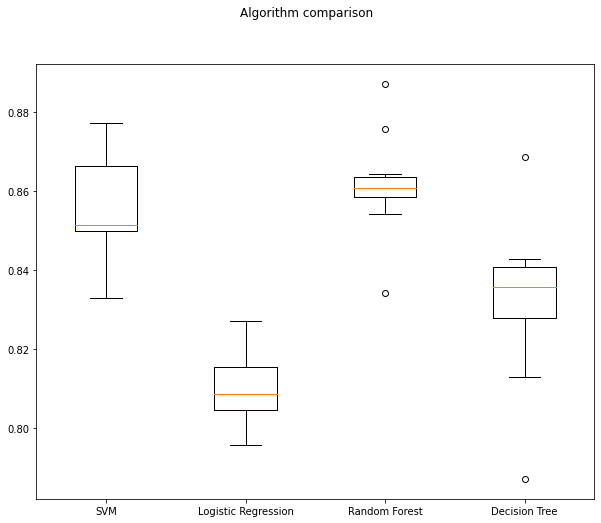

In [78]:
# fig = plt.figure()
fig=plt.figure(figsize=(10,8))

fig.suptitle('Algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Plotting ROC_AUC Curve

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score
classifiers = [svm,log_reg_tunned,rf_classifier,dt_classifier]
model=['SVM','Logistic Regression','Random Forest','Decision Tree']
result_table = pd.DataFrame(columns=['model','fpr','tpr','auc'])

for cls in classifiers:
    model = cls.fit(X_train,y_train)
    yproba = model.predict_proba(X_test)[::,1]
    fpr,tpr, _=roc_curve(y_test,yproba)
    auc = roc_auc_score(y_test,yproba)
    result_table = result_table.append({
        'model':cls.__class__.__name__,
        'fpr':fpr,
        'tpr':tpr,
        'auc':auc
    },ignore_index=True)
result_table.set_index('model',inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3272\2356720879.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({
C:\Users\Admin\AppData\Local\Temp\ipykernel_3272\2356720879.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({
C:\Users\Admin\AppData\Local\Temp\ipykernel_3272\2356720879.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({
C:\Users\Admin\AppData\Local\Temp\ipykernel_3272\2356720879.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({


In [66]:
print(result_table)

                                                                      fpr  \
model                                                                       
SVC                     [0.0, 0.0, 0.0, 0.0004192872117400419, 0.00041...   
LogisticRegression      [0.0, 0.0004192872117400419, 0.000419287211740...   
RandomForestClassifier  [0.0, 0.0, 0.0, 0.0004192872117400419, 0.00041...   
DecisionTreeClassifier  [0.0, 0.0008385744234800838, 0.006289308176100...   

                                                                      tpr  \
model                                                                       
SVC                     [0.0, 0.0016260162601626016, 0.030894308943089...   
LogisticRegression      [0.0, 0.0, 0.0065040650406504065, 0.0065040650...   
RandomForestClassifier  [0.0, 0.0016260162601626016, 0.017886178861788...   
DecisionTreeClassifier  [0.0, 0.0016260162601626016, 0.095934959349593...   

                             auc  
model                             
SVC 

## Plot The Figure

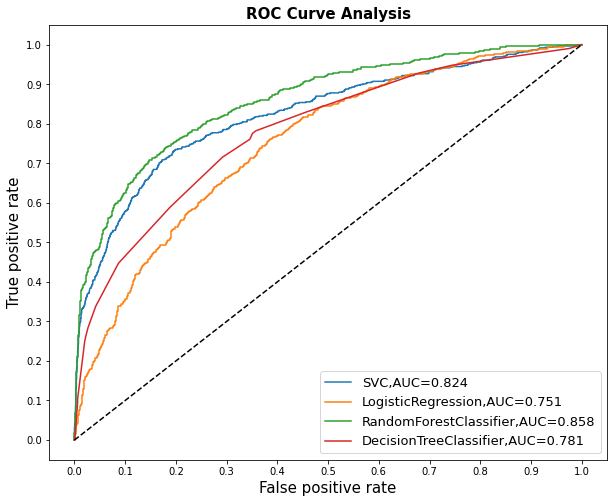

In [80]:
fig=plt.figure(figsize=(10,8))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
            result_table.loc[i]['tpr'],
            label="{},AUC={:.3f}".format(i,result_table.loc[i]['auc']))
plt.plot([0,1],[0,1],color='black',linestyle='--')

plt.xticks(np.arange(0.0,1.1,step=0.1))
plt.xlabel("False positive rate",fontsize=15)

plt.yticks(np.arange(0.0,1.1,step=0.1))
plt.ylabel("True positive rate",fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold',fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()